### Loading Required Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        

/kaggle/input/2019-coronavirus-dataset-01212020-01262020/2019_nCoV_20200121_20200128.csv
/kaggle/input/2019-coronavirus-dataset-01212020-01262020/2019_nC0v_20200121_20200126_cleaned.csv
/kaggle/input/2019-coronavirus-dataset-01212020-01262020/2019_nCoV_20200121_20200131.csv
/kaggle/input/2019-coronavirus-dataset-01212020-01262020/2019_nCoV_20200121_20200130.csv
/kaggle/input/2019-coronavirus-dataset-01212020-01262020/2019_nCoV_20200121_20200205.csv
/kaggle/input/2019-coronavirus-dataset-01212020-01262020/2019_nCoV_20200121_20200127.csv
/kaggle/input/2019-coronavirus-dataset-01212020-01262020/2019_nCoV_20200121_20200201.csv
/kaggle/input/2019-coronavirus-dataset-01212020-01262020/2019_nCoV_20200121_20200206.csv
/kaggle/input/2019-coronavirus-dataset-01212020-01262020/2019_nC0v_20200121_20200126 - SUMMARY.csv


In [2]:
# loading dataset
cov = pd.read_csv('../input/2019-coronavirus-dataset-01212020-01262020/2019_nCoV_20200121_20200206.csv'
                  , header=0
                  , names=['state','country','last_update','confirmed','suspected','recovered','death'])
cov.head()

,state,country,last_update,confirmed,suspected,recovered,death
0,Hubei,Mainland China,2/5/20 16:43,16678.0,NaN,538.0,479.0
1,Guangdong,Mainland China,2/5/20 13:23,895.0,NaN,49.0,0.0
2,Zhejiang,Mainland China,2/5/20 15:13,895.0,NaN,78.0,0.0
3,Henan,Mainland China,2/5/20 15:03,764.0,NaN,47.0,2.0
4,Hunan,Mainland China,2/5/20 15:23,661.0,NaN,54.0,0.0


In [3]:
# dealing with dates, converting dates with hours and minutes in just dates with year, month and day
cov['last_update'] = pd.to_datetime(cov['last_update']).dt.date

As we can see we have some missing values, Let's start understanding our dataset structure before doo any visualizations

In [4]:
cov.info() # seeing dataset structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1877 entries, 0 to 1876
Data columns (total 7 columns):
state          1418 non-null object
country        1877 non-null object
last_update    1877 non-null object
confirmed      1847 non-null float64
suspected      88 non-null float64
recovered      1001 non-null float64
death          878 non-null float64
dtypes: float64(4), object(3)
memory usage: 102.8+ KB


### Dealing with missing values
Now let's see how many missing values we have in each column

In [5]:
cov.isna().sum()

state           459
country           0
last_update       0
confirmed        30
suspected      1789
recovered       876
death           999
dtype: int64

State column has 125 missing values, let's replace them by "unknow" because we dont know what state is. confirmed, suspected, recovered and death columns have many missing values, let's assume that where a missing value is present was not cases registred then let's replace them with 0

In [6]:
# replacing state missing values by "unknow"
cov['state'] = cov['state'].fillna('unknow')

# replacing numerical variables missing values by 0
cov = cov.fillna(0)

### Exploratory Data Analysis

#### Total cases by state in China
To plot the number of cases in China first let's create a subset with cases in Mainland China, after that we need to take the updated number of cases for each state, here i assumed that the last update had the higher number of confirmed cases

In [7]:
# taking cov columns where the country are China
china = cov[['state','confirmed','suspected','recovered','death']][cov['country']=='Mainland China']

# taking the max value by state
china = china[['confirmed','suspected','recovered','death']].groupby(cov['state']).max()

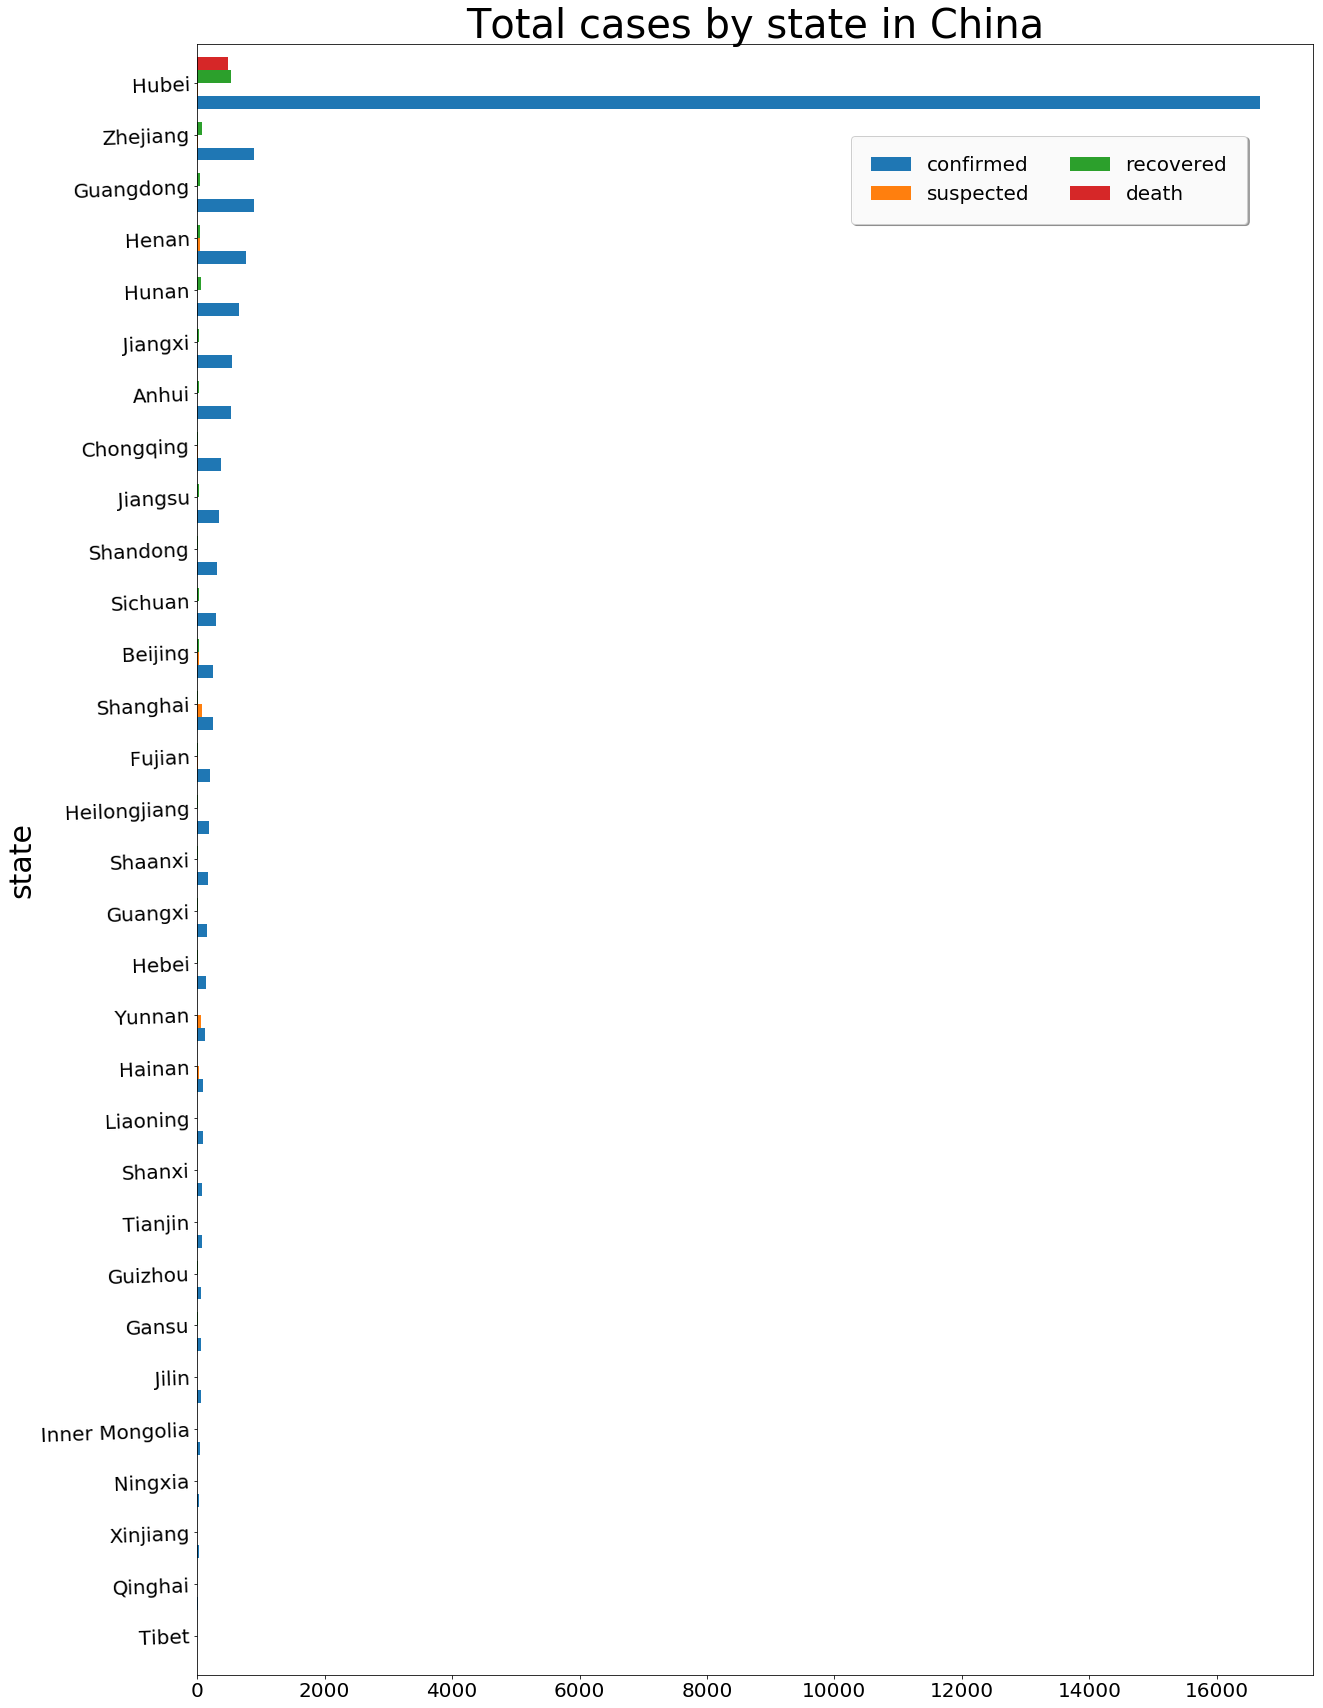

In [8]:
# creating the plot
china.sort_values(by='confirmed',ascending=True).plot(kind='barh',figsize=(20,30), width=1,rot=2)

# defyning legend and titles parameters
plt.title('Total cases by state in China',size=40)
plt.ylabel('state',size=30)
plt.yticks(size=20)
plt.xticks(size=20)
plt.legend(bbox_to_anchor=(0.95,0.95) # setting coordinates for the caption box
           , frameon = True
           , fontsize = 20
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

#### Hubei Cases Distribution
Clearly Hubei have the higher case numbers, if we take a more detailed look into Hubei data with a pie chart we can see the same distribution above but with more detalies, 94.2% of the cases was confirmed, 2.7% of infected people had died, 3% recovered and only 0.1% are suspect.

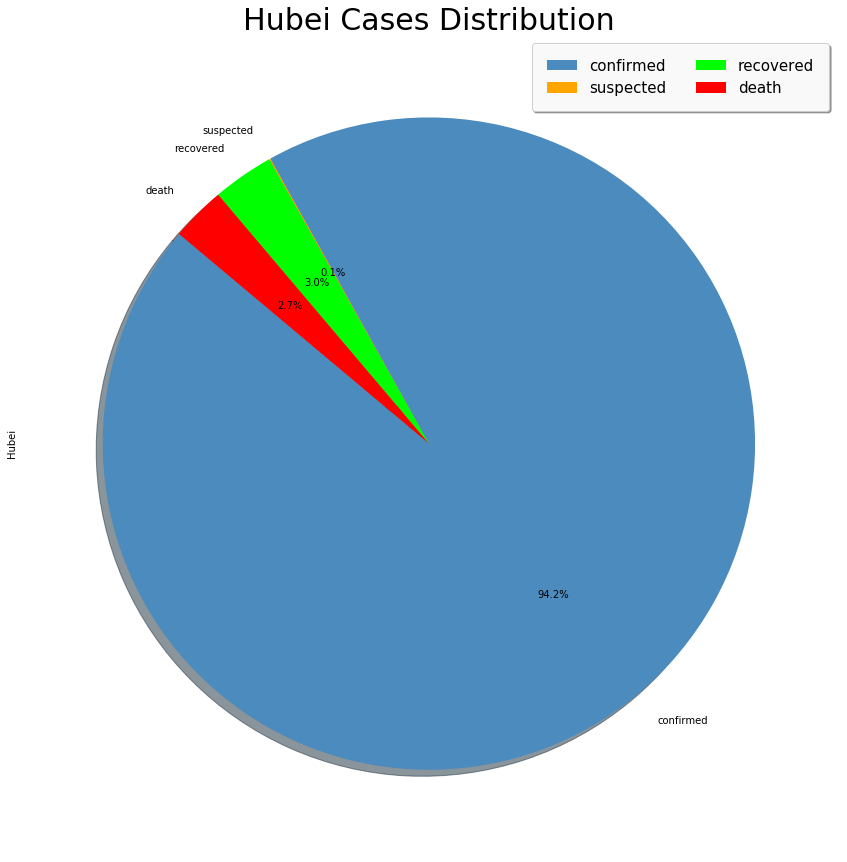

In [9]:
# taking cases numbers
Hubei = china[china.index=="Hubei"]
Hubei = Hubei.iloc[0]

# difyning plot size
plt.figure(figsize=(15,15))

# here i use .value_counts() to count the frequency that each category occurs of dataset
Hubei.plot(kind='pie'
           , colors=['#4b8bbe','orange','lime','red']
           , autopct='%1.1f%%' # adding percentagens
           , shadow=True
           , startangle=140)

# defyning titles and legend parameters
plt.title('Hubei Cases Distribution',size=30)
plt.legend(loc = "upper right"
           , frameon = True
           , fontsize = 15
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

#### Cases Growth in China

The cases are growing fast over the days and the confirmed cases are leading the run, let's take a look in cases growth over the days in China.

In [10]:
# taking cases and dates in china
china_cases_grow = cov[['last_update','confirmed','suspected','recovered','death']][cov['country']=='Mainland China']

# creating a new subset with cases over the days
china_confirmed_grow = china_cases_grow[['confirmed']].groupby(cov['last_update']).max()
china_suspected_grow = china_cases_grow[['suspected']].groupby(cov['last_update']).max()
china_recovered_grow = china_cases_grow[['recovered']].groupby(cov['last_update']).max()
china_death_grow = china_cases_grow[['death']].groupby(cov['last_update']).max()

The confirmed cases have grown incredible over the last days giving only short stops along the way in 1/31/2020 was more than 10000 confirmed cases in Mainland China and now we are passing 15000 confirmed cases

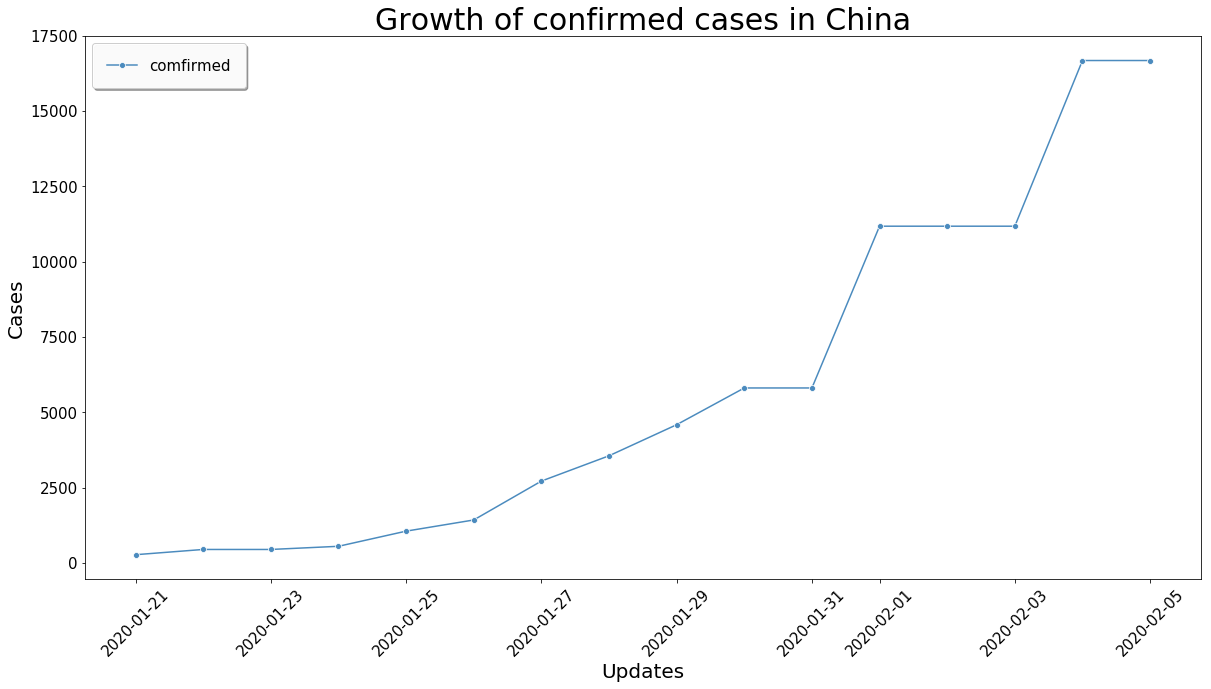

In [11]:
# defyning plotsize
plt.figure(figsize=(20,10))

# creating the plot
sns.lineplot(x = china_confirmed_grow.index
        , y = 'confirmed'
        , color = '#4b8bbe'
        , label = 'comfirmed'
        , marker = 'o'
        , data = china_confirmed_grow)

# titles parameters
plt.title('Growth of confirmed cases in China',size=30)
plt.ylabel('Cases',size=20)
plt.xlabel('Updates',size=20)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)

# legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

The number of deaths are rising fast, was more fast then number of recovered cases but finally the recovered are passing the deaths, suspected cases had great variations but since 1/27/2020 that we have no more suspected cases increases, but deaths continuos to grow

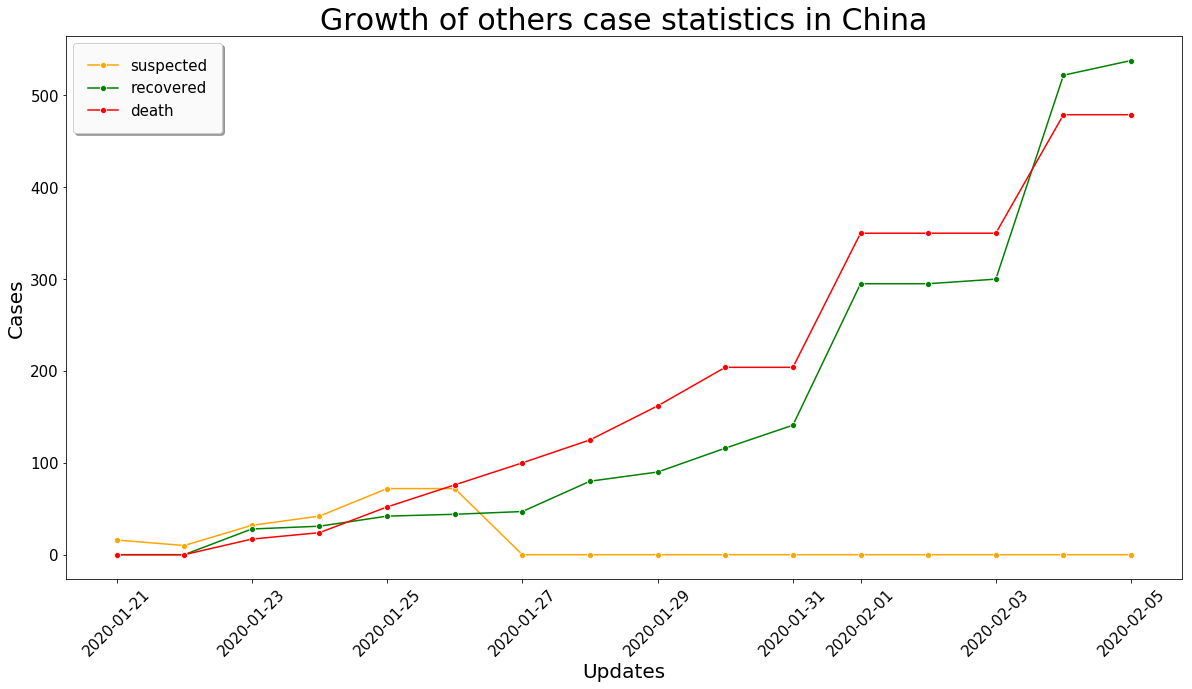

In [12]:
# defyning plotsize
plt.figure(figsize=(20,10))

# creating a lineplot for each case variable(suspected, recovered and death)
sns.lineplot(x = china_suspected_grow.index
        , y = 'suspected'
        , color = 'orange'
        , label = 'suspected'
        , marker = 'o'
        , data = china_suspected_grow)

sns.lineplot(x = china_recovered_grow.index
        , y = 'recovered'
        , color = 'green'
        , label = 'recovered'
        , marker = 'o'
        , data = china_recovered_grow)

sns.lineplot(x = china_death_grow.index
        , y = 'death'
        , color = 'red'
        , label = 'death'
        , marker = 'o'
        , data = china_death_grow)

# defyning titles, labels and ticks parameters
plt.title('Growth of others case statistics in China',size=30)
plt.ylabel('Cases',size=20)
plt.xlabel('Updates',size=20)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)

# defyning legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

#### Total cases in other countries

We already see the virus distribution and growth in China, but in other coutries? How coronavirus are growing and distributed?

To answer this question let's take all cases that are not in China and then take the maximum number of cases assuming that the maximum number of cases  are the last update.

Hong Kong continues to lead suspicious cases, but it was passed by Thailand in confirmed cases, in Brazil (my country) suspicious cases begin to appear.

In [13]:
# taking all cases that are not in China
other_countries = cov[['country','confirmed','suspected','recovered','death']][cov['country']!='Mainland China']

# taking cases by country
other_countries = other_countries[['confirmed','suspected','recovered','death']].groupby(other_countries['country']).max()

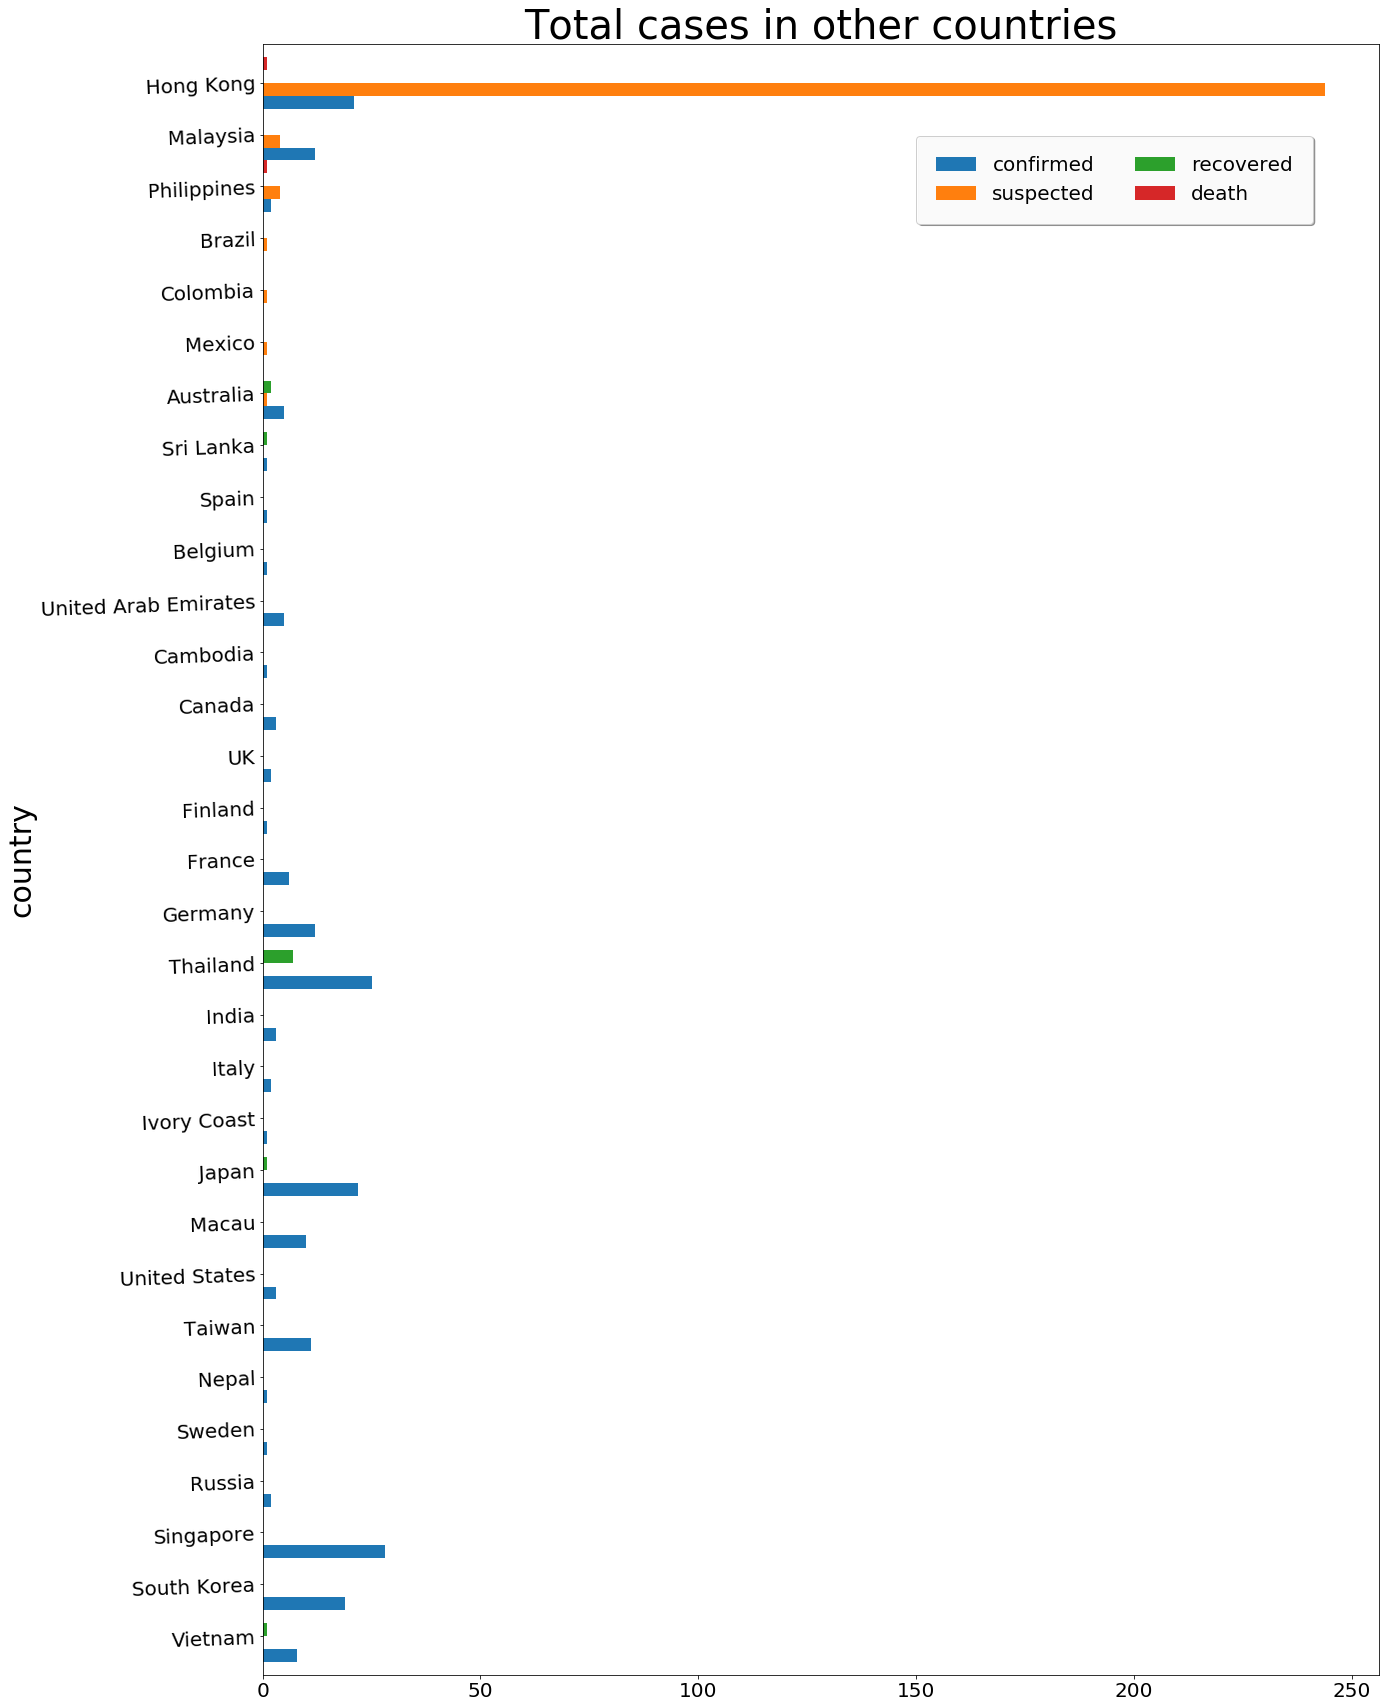

In [14]:
# creating the plot
other_countries.sort_values(by='suspected',ascending=True).plot(kind='barh',figsize=(20,30), width=1,rot=2)

# defyning titles, labels, xticks and legend parameters
plt.title('Total cases in other countries',size=40)
plt.ylabel('country',size=30)
plt.yticks(size=20)
plt.xticks(size=20)
plt.legend(bbox_to_anchor=(0.95,0.95)
           , frameon = True
           , fontsize = 20
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

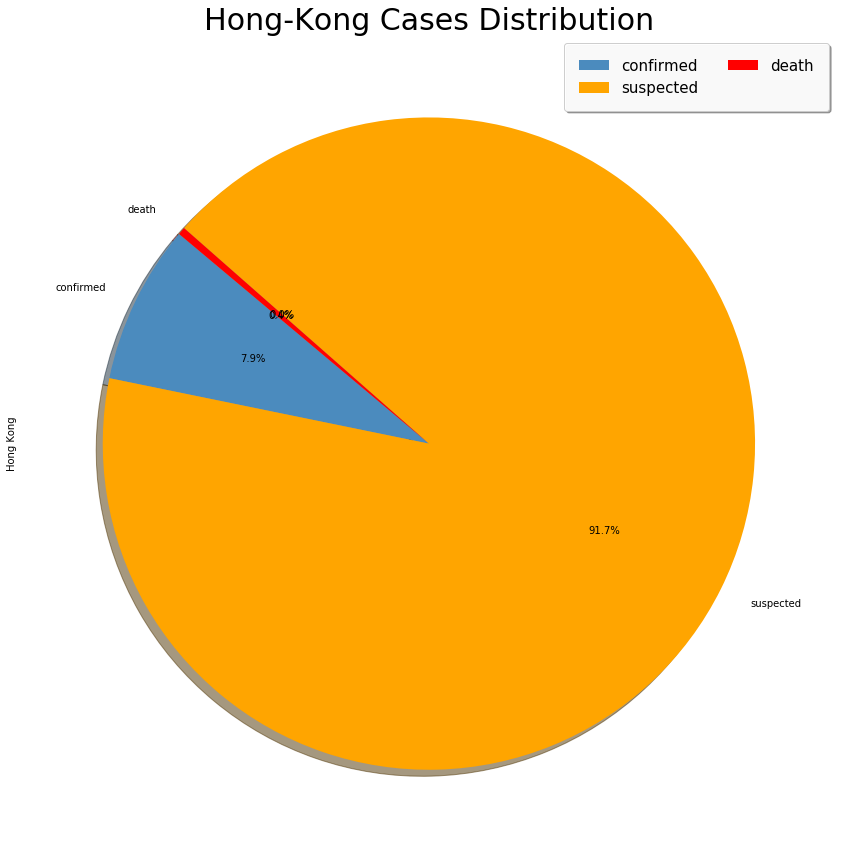

In [15]:
# taking cases in Hong-Kong
Hong_Kong = other_countries[other_countries.index=="Hong Kong"]
Hong_Kong = Hong_Kong.iloc[0]

# difyning plot size
plt.figure(figsize=(15,15))

 # here i use .value_counts() to count the frequency that each category occurs of dataset
Hong_Kong.plot(kind='pie'
           , colors=['#4b8bbe','orange','lime','red']
           , autopct='%1.1f%%' # adding percentagens
           , shadow=True
           , startangle=140)

# defyning title and legend parameters
plt.title('Hong-Kong Cases Distribution',size=30)
plt.legend(loc = "upper right"
           , frameon = True
           , fontsize = 15
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

#### Growth of cases over the days in other countries

The virus begins to appear in other countries on 1/23/2020 and is spreading rapidly over the days. On 2020-02-01 the firsts recovered cases appear,on 2020-02-02 the firsts deaths appear, fortunately the number of recovereds are growing more fast than deaths in others countries compared with china, until now 2020-02-05 are more then 250 suspected cases and more then 200 cases confirmed, we will follow over the next few days to see if these numbers improve.

In [16]:
# taking cases from countries that are not China
other_countries_cases = cov[['country','last_update','confirmed','suspected','recovered','death']][cov['country']!='Mainland China']

# Taking total of confirmed cases countries
other_countries_confirmed = other_countries_cases[['last_update','confirmed']].groupby(cov['country']).max()
other_countries_cases_growth = other_countries_confirmed[['confirmed']].groupby(other_countries_confirmed['last_update']).sum()
other_countries_cases_growth = other_countries_cases_growth[['confirmed']].cumsum()

# Taking total of suspected cases countries
other_countries_suspected = other_countries_cases[['last_update','suspected']].groupby(cov['country']).max()
other_countries_suspected_growth = other_countries_suspected[['suspected']].groupby(other_countries_suspected['last_update']).sum()
other_countries_suspected_growth = other_countries_suspected_growth[['suspected']].cumsum()

# Taking total of recovered cases countries
other_countries_recovered = other_countries_cases[['last_update','recovered']].groupby(cov['country']).max()
other_countries_recovered_growth = other_countries_recovered[['recovered']].groupby(other_countries_recovered['last_update']).sum()
other_countries_recovered_growth = other_countries_recovered_growth[['recovered']].cumsum()

# Taking total of death cases countries
other_countries_death = other_countries_cases[['last_update','death']].groupby(cov['country']).max()
other_countries_death_growth = other_countries_death[['death']].groupby(other_countries_death['last_update']).sum()
other_countries_death_growth = other_countries_death_growth[['death']].cumsum()

# Joing all case types in one dataset adding new columns
other_countries_cases_growth['suspected'] = other_countries_suspected_growth['suspected']
other_countries_cases_growth['recovered'] = other_countries_recovered_growth['recovered']
other_countries_cases_growth['death'] = other_countries_death_growth['death']

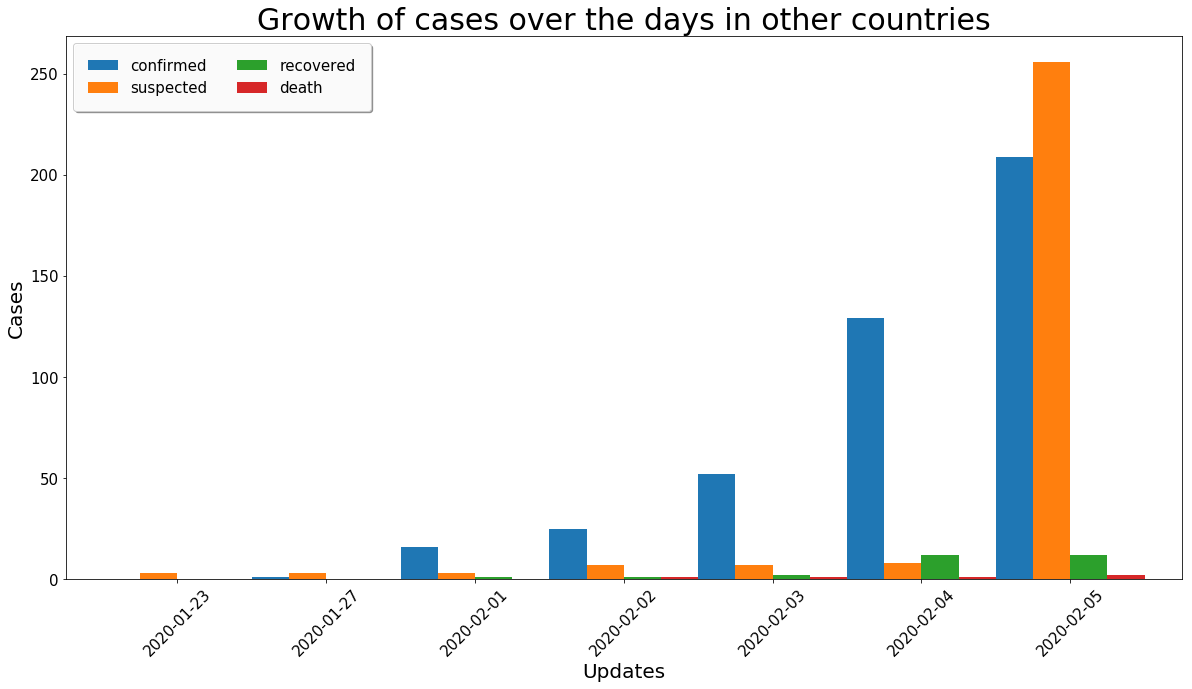

In [17]:
# creating the plot
other_countries_cases_growth.plot(kind='bar',figsize=(20,10), width=1,rot=2)

# defyning title, labels, ticks and legend parameters
plt.title('Growth of cases over the days in other countries',size=30)
plt.xlabel('Updates', size=20)
plt.ylabel('Cases', size=20)
plt.xticks(rotation=45, size=15)
plt.yticks(size=15)
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);